In [1]:
import sys 
sys.path.append('..')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_excel('../input/Bograd_PISY_normalized.xlsx')

In [57]:
trees = ['pisy_01a', 'pisy_01b', 'pisy_02a', 'pisy_03a', 'pisy_07a', 'pisy_12b', 'pisy_14a']
trees_numbers = {k: v for k, v in zip(trees, [f'Tree {i}' for i in range(1,8)])}
columns = {_:f'D{__}' if __<16 else f'CWT{__-15}' for _, __ in zip(range(2,32), range(1,31))}
columns[0] = 'Tree'
columns[1] = 'Year'

In [62]:
def make_fig():
    fig, ax = plt.subplots(nrows=5, ncols=2, dpi=300, figsize=(10, 20))
    # plt.subplots_adjust(bottom=.03, top=.95, hspace=.15, wspace=.2)
    gs = ax[4, 0].get_gridspec()
    # remove the underlying axes
    ax[4,0].remove()
    ax[4,1].remove()
    ax_big = fig.add_subplot(gs[4, 0:])

    fig.tight_layout()
    plt.close(fig)
    return fig, ax, ax_big

fig_A, ax_A, ax_big_A = make_fig()
fig_B, ax_B, ax_big_B = make_fig()

In [ ]:
mean_objects_years = dict()
to_plot = True


for year in set(df['Year']):
    temp_data = df[df['Year']==year]
    if len(temp_data) > 3:
        mean_objects_years[year] = temp_data.mean()[1:]
        if to_plot:
            for _, el in temp_data.iterrows():
                ax_A[0,0].plot(el[2:17], c='gray', label=trees_numbers[el[0]])
            ax_A[0,0].plot(mean_objects_years[year][:15], color='black', lw=2, label='Mean')
            ax_A[0,0].legend(frameon=False)
            ax_A[0,0].set_title(f'Year {year}')
            for _, el in temp_data.iterrows():
                ax_A[0,1].plot([f'C{j}' for j in range(1,16)], el[17:32], c='gray', label=trees_numbers[el[0]])
            ax_A[0,1].plot([f'C{j}' for j in range(1,16)], mean_objects_years[year][15:], color='black', lw=2, label='Mean')
            ax_A[0,1].legend(frameon=False)
            ax_A[0,1].set_title(f'Year {year}')
            to_plot = False


mean_objects_trees = dict()

for tree in set(df['Tree']):
    mean_objects_trees[tree] = df[df['Tree']==tree].mean()[1:]

In [ ]:
global_mean = df.mean()[1:]

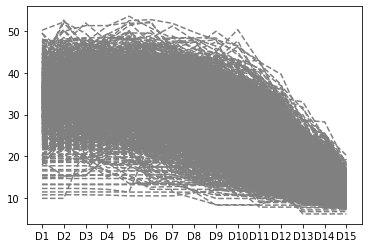

In [65]:
for _, row in df.iterrows():
    plt.plot(row[2:17], '--', color='gray')

In [ ]:
quotient_deviation_df_A = []

_columns = {_:f'D{_}' if _<16 else f'CWT{_-15}' for _ in  range(1,31)}
_columns[0] = 'Year'

for year, mean_obj in mean_objects_years.items():
    quotient_deviation_df_A += [[year] + list(mean_obj/global_mean)]

quotient_deviation_df_A = pd.DataFrame(quotient_deviation_df_A).rename(columns=_columns)

In [ ]:
qd_df_B = []

quotient_deviation_df_B = dict()


for _, row in df.iterrows():
    qd_df_B += [[row[0], row[1]] + list(row[2:] / mean_objects_trees[row[0]])]

qd_df_B = pd.DataFrame(qd_df_B).rename(columns=columns)

for year in set(df['Year']):
    temp_data_q = qd_df_B[qd_df_B['Year']==year]
    if len(temp_data_q) > 3:
        quotient_deviation_df_B[year] = temp_data_q.mean()[1:]

quotient_deviation_df_B = pd.DataFrame(quotient_deviation_df_B).transpose()

# Fig 2

In [3]:
from utils.functions import get_normalized_list

In [4]:
xlsx_file = pd.ExcelFile('../input/БОГРАД_PISY.xlsx')
trees = ['pisy_01a', 'pisy_01b', 'pisy_02a', 'pisy_03a', 'pisy_07a', 'pisy_12b', 'pisy_14a']
columns = {_:f'D{__}' if __<16 else f'CWT{__-15}' for _, __ in zip(range(2,32), range(1,31))}
columns[0] = 'Tree'
columns[1] = 'Year'

In [5]:
tree = trees[0]
df = xlsx_file.parse(tree)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.dropna(axis=0)

year = 2000
Dmean = list(df[df['Год']==year]['Dmean'])
Dmean_norm = get_normalized_list(Dmean, 15)
CWTmean = list(df[df['Год']==year]['CWTmean'])
CWTmean_norm = get_normalized_list(CWTmean, 15)

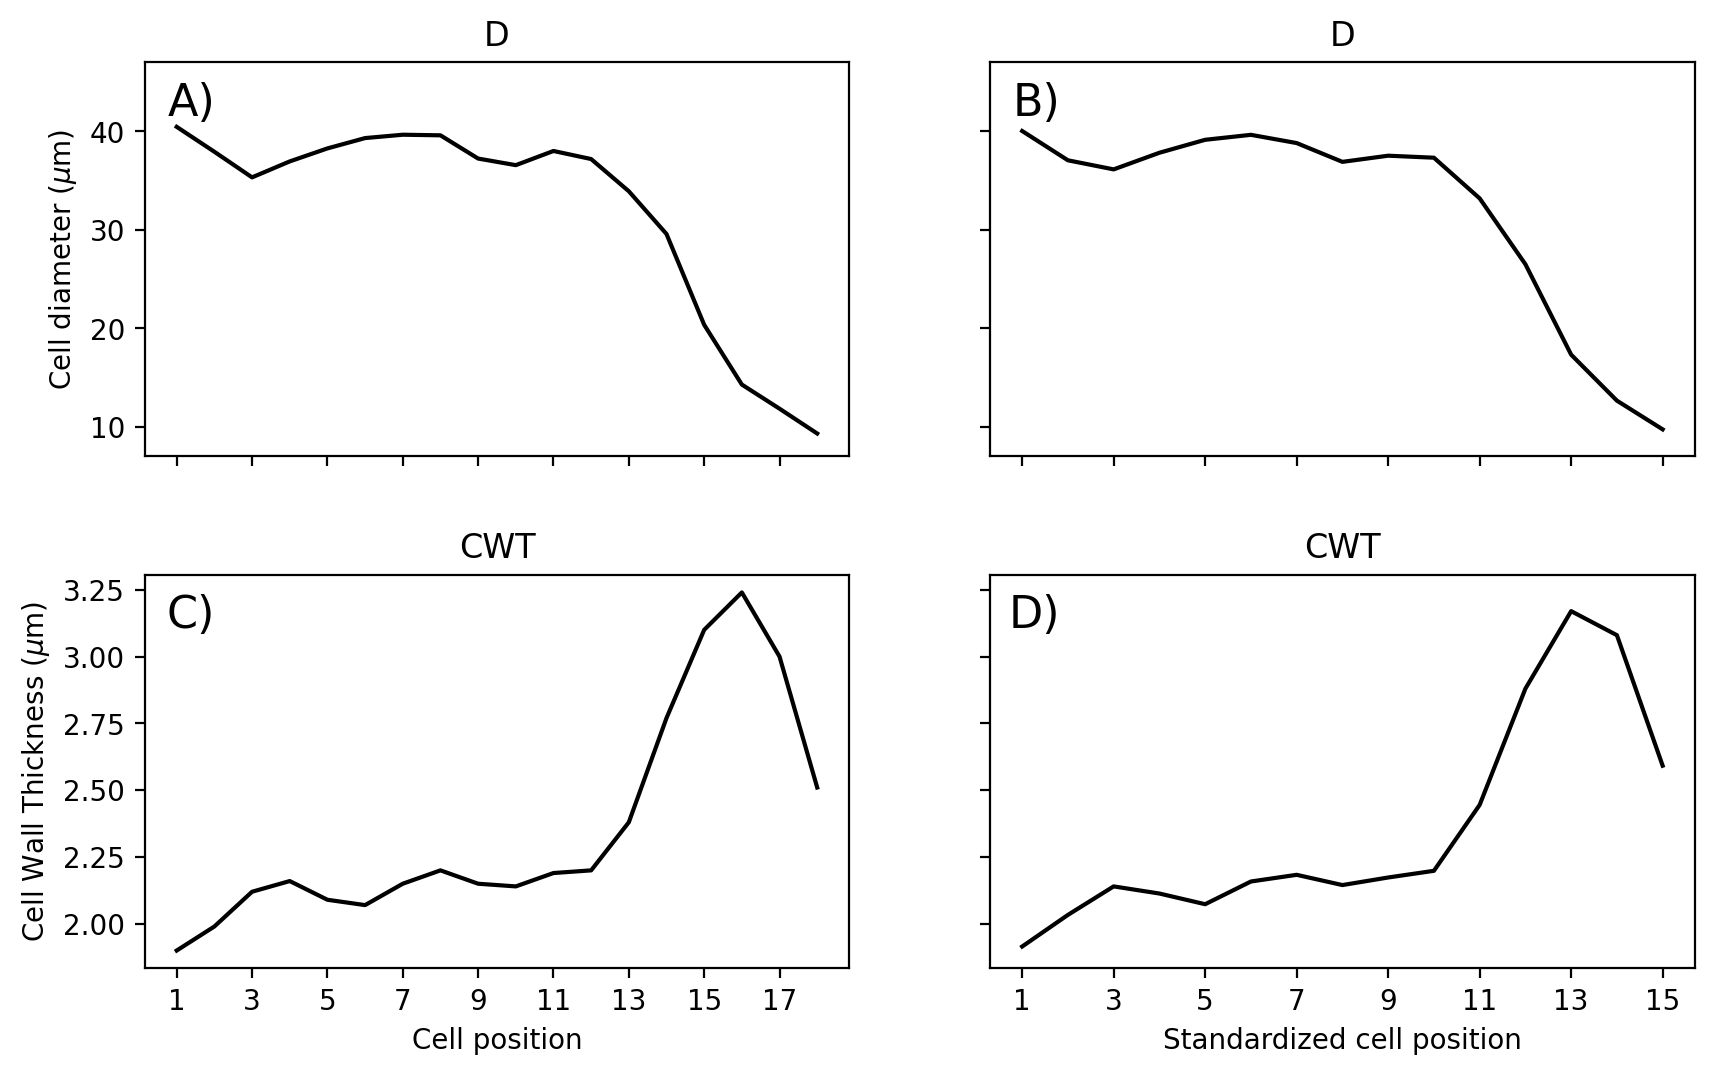

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,6), dpi=200, sharex='col', sharey='row')
plt.subplots_adjust(hspace=0.3)

subplot_labels = ['A)', 'B)', 'C)', 'D)']

ax[0, 0].plot(range(1, len(Dmean)+1), Dmean, c='k')
ax[1, 0].plot(range(1, len(CWTmean)+1), CWTmean, c='k')
ax[0, 1].plot(range(1, len(Dmean_norm)+1), Dmean_norm, c='k')
ax[1, 1].plot(range(1, len(CWTmean_norm)+1), CWTmean_norm, c='k')

ax[0, 0].set_title('D')
ax[1, 0].set_title('CWT')
ax[0, 1].set_title('D')
ax[1, 1].set_title('CWT')

ax[0, 0].set_ylim([7, 47])

ax[0, 0].set_ylabel('Cell diameter ($\mu$m)')
ax[1, 0].set_ylabel('Cell Wall Thickness ($\mu$m)')
ax[1, 0].set_xlabel('Cell position')
ax[1, 1].set_xlabel('Standardized cell position')
ax[1, 0].set_xticks(np.arange(1, len(Dmean)+1, 2))
ax[1, 1].set_xticks(np.arange(1, len(Dmean_norm)+1, 2))

for i in range(4):
    ax[int(i>1), i%2].text(0.1, 0.95, subplot_labels[i], transform=ax[int(i>1), i%2].transAxes, fontsize=16, va='top', ha='right')

In [7]:
#fig.savefig(f'../output/Fig 2.eps', dpi=300)
fig.savefig(f'../output/Fig 2.png', dpi=300) 
plt.close(fig)

# Fig 3

In [3]:
df = pd.read_excel('../input/Bograd_PISY_normalized.xlsx')

In [4]:
global_mean = df.mean()[1:]

mean_objects_years = dict()

for year in set(df['Year']):
    temp_data = df[df['Year']==year]
    if len(temp_data) > 3:
        mean_objects_years[year] = temp_data.mean()[1:]


mean_objects_trees = dict()

for tree in set(df['Tree']):
    mean_objects_trees[tree] = df[df['Tree']==tree].mean()[1:]

C:\Users\Mikhail\AppData\Local\Temp/ipykernel_7604/2827229746.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  global_mean = df.mean()[1:]
C:\Users\Mikhail\AppData\Local\Temp/ipykernel_7604/2827229746.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_objects_years[year] = temp_data.mean()[1:]
C:\Users\Mikhail\AppData\Local\Temp/ipykernel_7604/2827229746.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_objects_trees[tree] = df[df['Tree']==tree].mean()[1:]


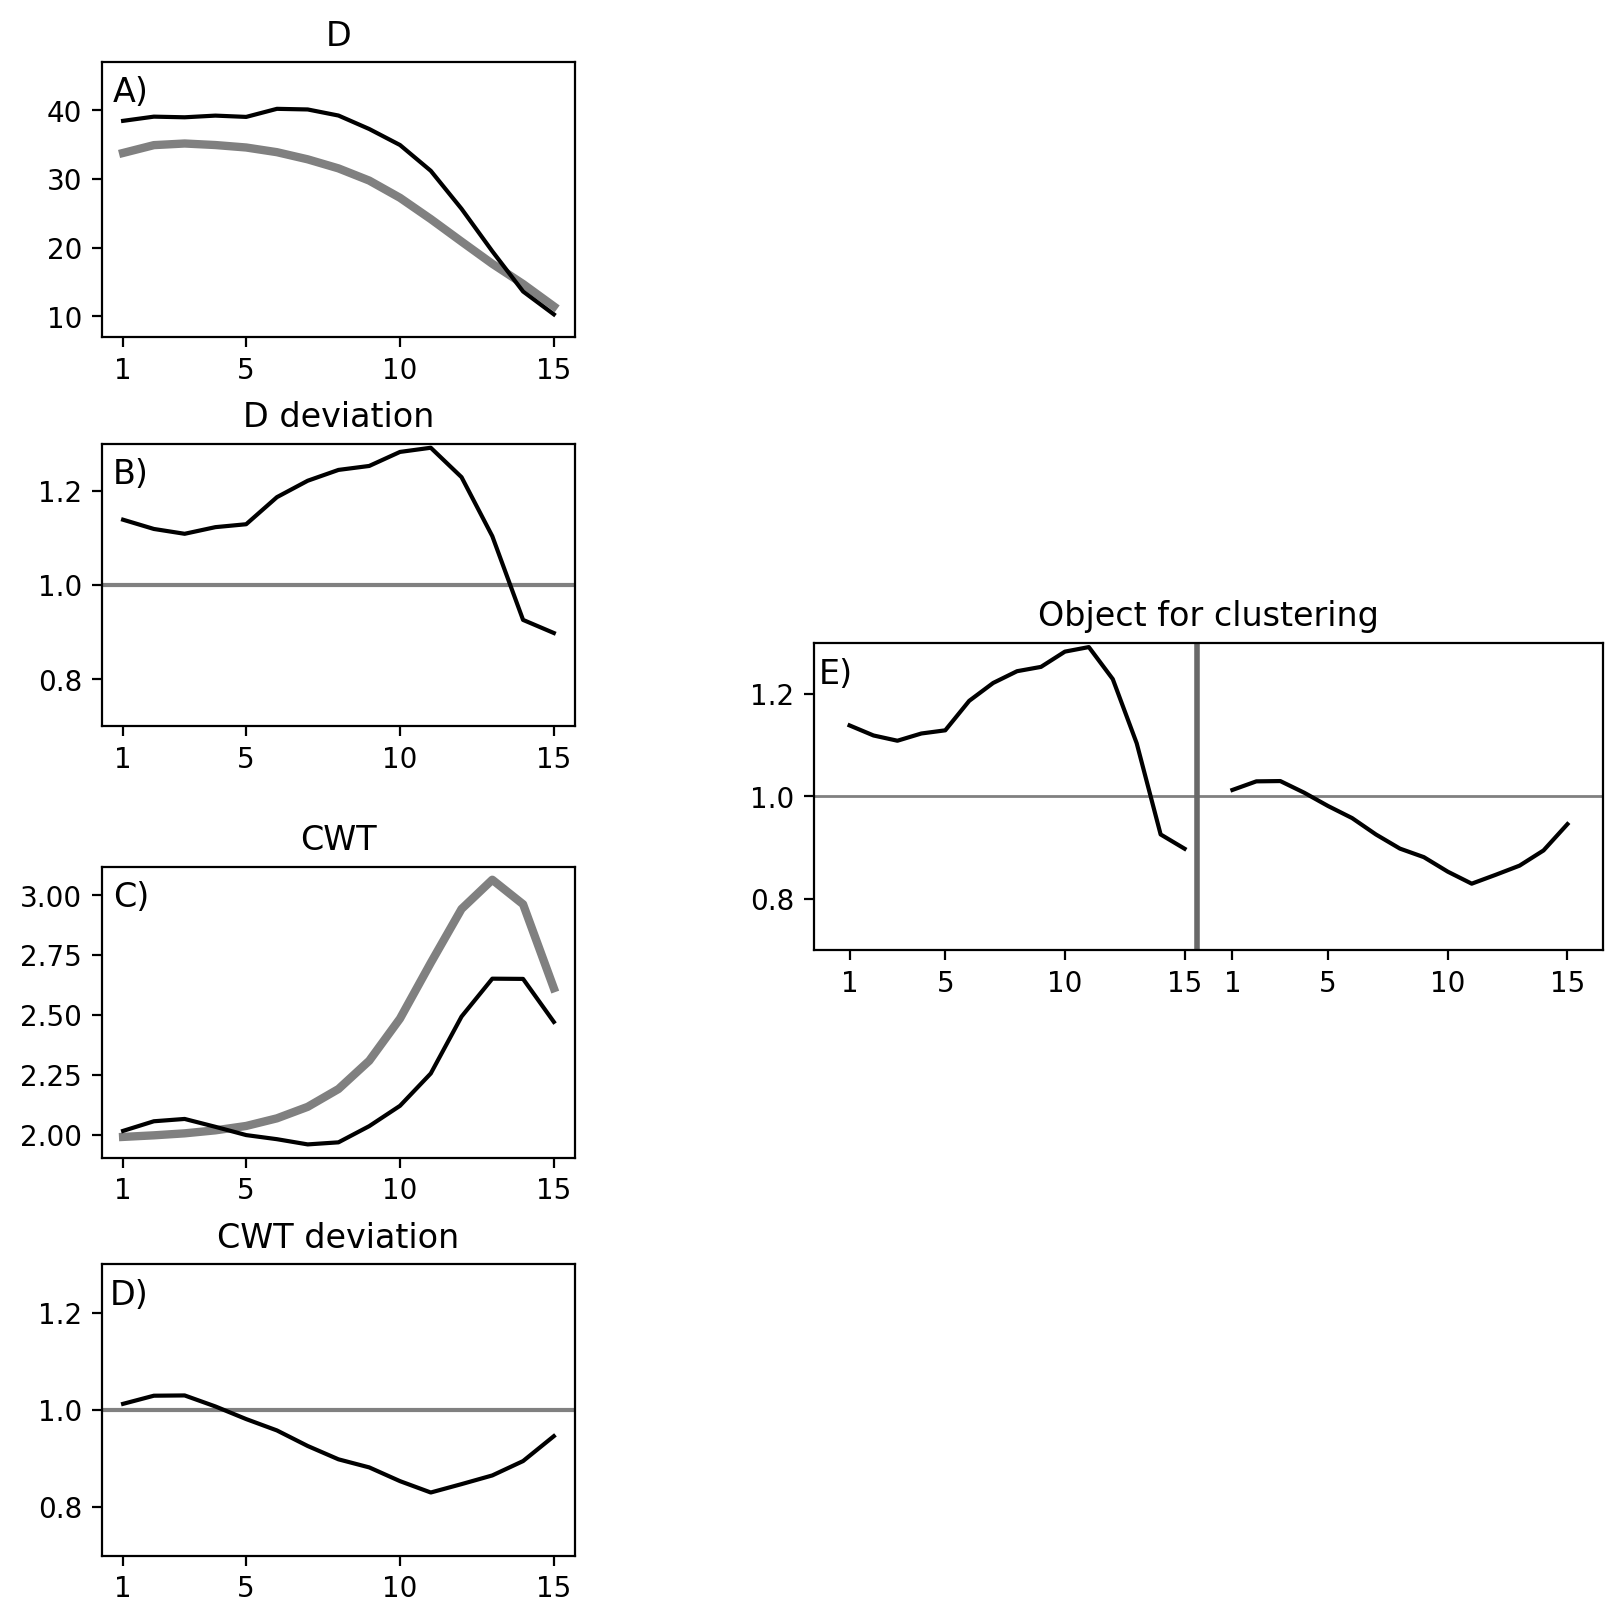

In [7]:
fig = plt.figure(constrained_layout=True, figsize=(8,8), dpi=200)
#plt.subplots_adjust(right=0.95, hspace=0.05, wspace=0.05, bottom=0.01)
gs = fig.add_gridspec(8, 9)
axes = [
    fig.add_subplot(gs[0:2, 0:3]),
    fig.add_subplot(gs[2:4, 0:3]),
    fig.add_subplot(gs[4:6, 0:3]),
    fig.add_subplot(gs[6:8, 0:3]),
    fig.add_subplot(gs[3:5, 4:10])
]

y = mean_objects_years[2000]

axes[0].plot(range(1,16), global_mean[:15], color='gray', linewidth=3 )
axes[0].plot(range(1,16), y[:15], 'black')
axes[1].axhline(y=1, color='grey')
axes[1].plot(range(1,16), [i / j for i, j in zip(y[:15], global_mean[:15])], 'black')
axes[2].plot(range(1,16), global_mean[15:], color='gray', linewidth=3)
axes[2].plot(range(1,16), y[15:], 'black')
axes[3].axhline(y=1, color='grey')
axes[3].plot(range(1,16), [i / j for i, j in zip(y[15:], global_mean[15:])], 'black')

axes[4].axhline(y=1, color='grey', linewidth=1)
axes[4].axvline(x=15.5, color='dimgrey', linewidth=2)
axes[4].plot(range(1,16), [i / j for i, j in zip(y, list(global_mean))][:15], 'black')
axes[4].plot(range(17,32), [i / j for i, j in zip(y, list(global_mean))][15:], 'black')

axes[0].set_title('D')
axes[1].set_title('D deviation')
axes[2].set_title('CWT')
axes[3].set_title('CWT deviation')
axes[4].set_title('Object for clustering')

axes[0].set_ylim([7, 47])
axes[1].set_ylim([0.7, 1.3])
axes[3].set_ylim([0.7, 1.3])
axes[4].set_ylim([0.7, 1.3])

axes[0].text(0.1, 0.95, 'A)', transform=axes[0].transAxes, fontsize=12, va='top', ha='right')
axes[1].text(0.1, 0.95, 'B)', transform=axes[1].transAxes, fontsize=12, va='top', ha='right')
axes[2].text(0.1, 0.95, 'C)', transform=axes[2].transAxes, fontsize=12, va='top', ha='right')
axes[3].text(0.1, 0.95, 'D)', transform=axes[3].transAxes, fontsize=12, va='top', ha='right')
axes[4].text(0.05, 0.95, 'E)', transform=axes[4].transAxes, fontsize=12, va='top', ha='right')

axes[0].set_xticks([1, 5, 10, 15])
axes[1].set_xticks([1, 5, 10, 15])
axes[2].set_xticks([1, 5, 10, 15])
axes[3].set_xticks([1, 5, 10, 15])
axes[4].set_xticks([1, 5, 10, 15, 17, 21, 26, 31])

axes[0].set_xticklabels([1, 5, 10, 15])
axes[1].set_xticklabels([1, 5, 10, 15])
axes[2].set_xticklabels([1, 5, 10, 15])
axes[3].set_xticklabels([1, 5, 10, 15])
axes[4].set_xticklabels([1, 5, 10, 15, 1, 5, 10, 15])

plt.show()

In [8]:
fig.savefig(f'../output/Fig 3.svg', dpi=300)
fig.savefig(f'../output/Fig 3.png', dpi=300) 
plt.close(fig)

# Fig S1

In [17]:
quotient_deviation_df_A = pd.read_excel('../output/quotient_deviation_df_A.xlsx')
quotient_deviation_df_B = pd.read_excel('../output/quotient_deviation_df_B.xlsx')

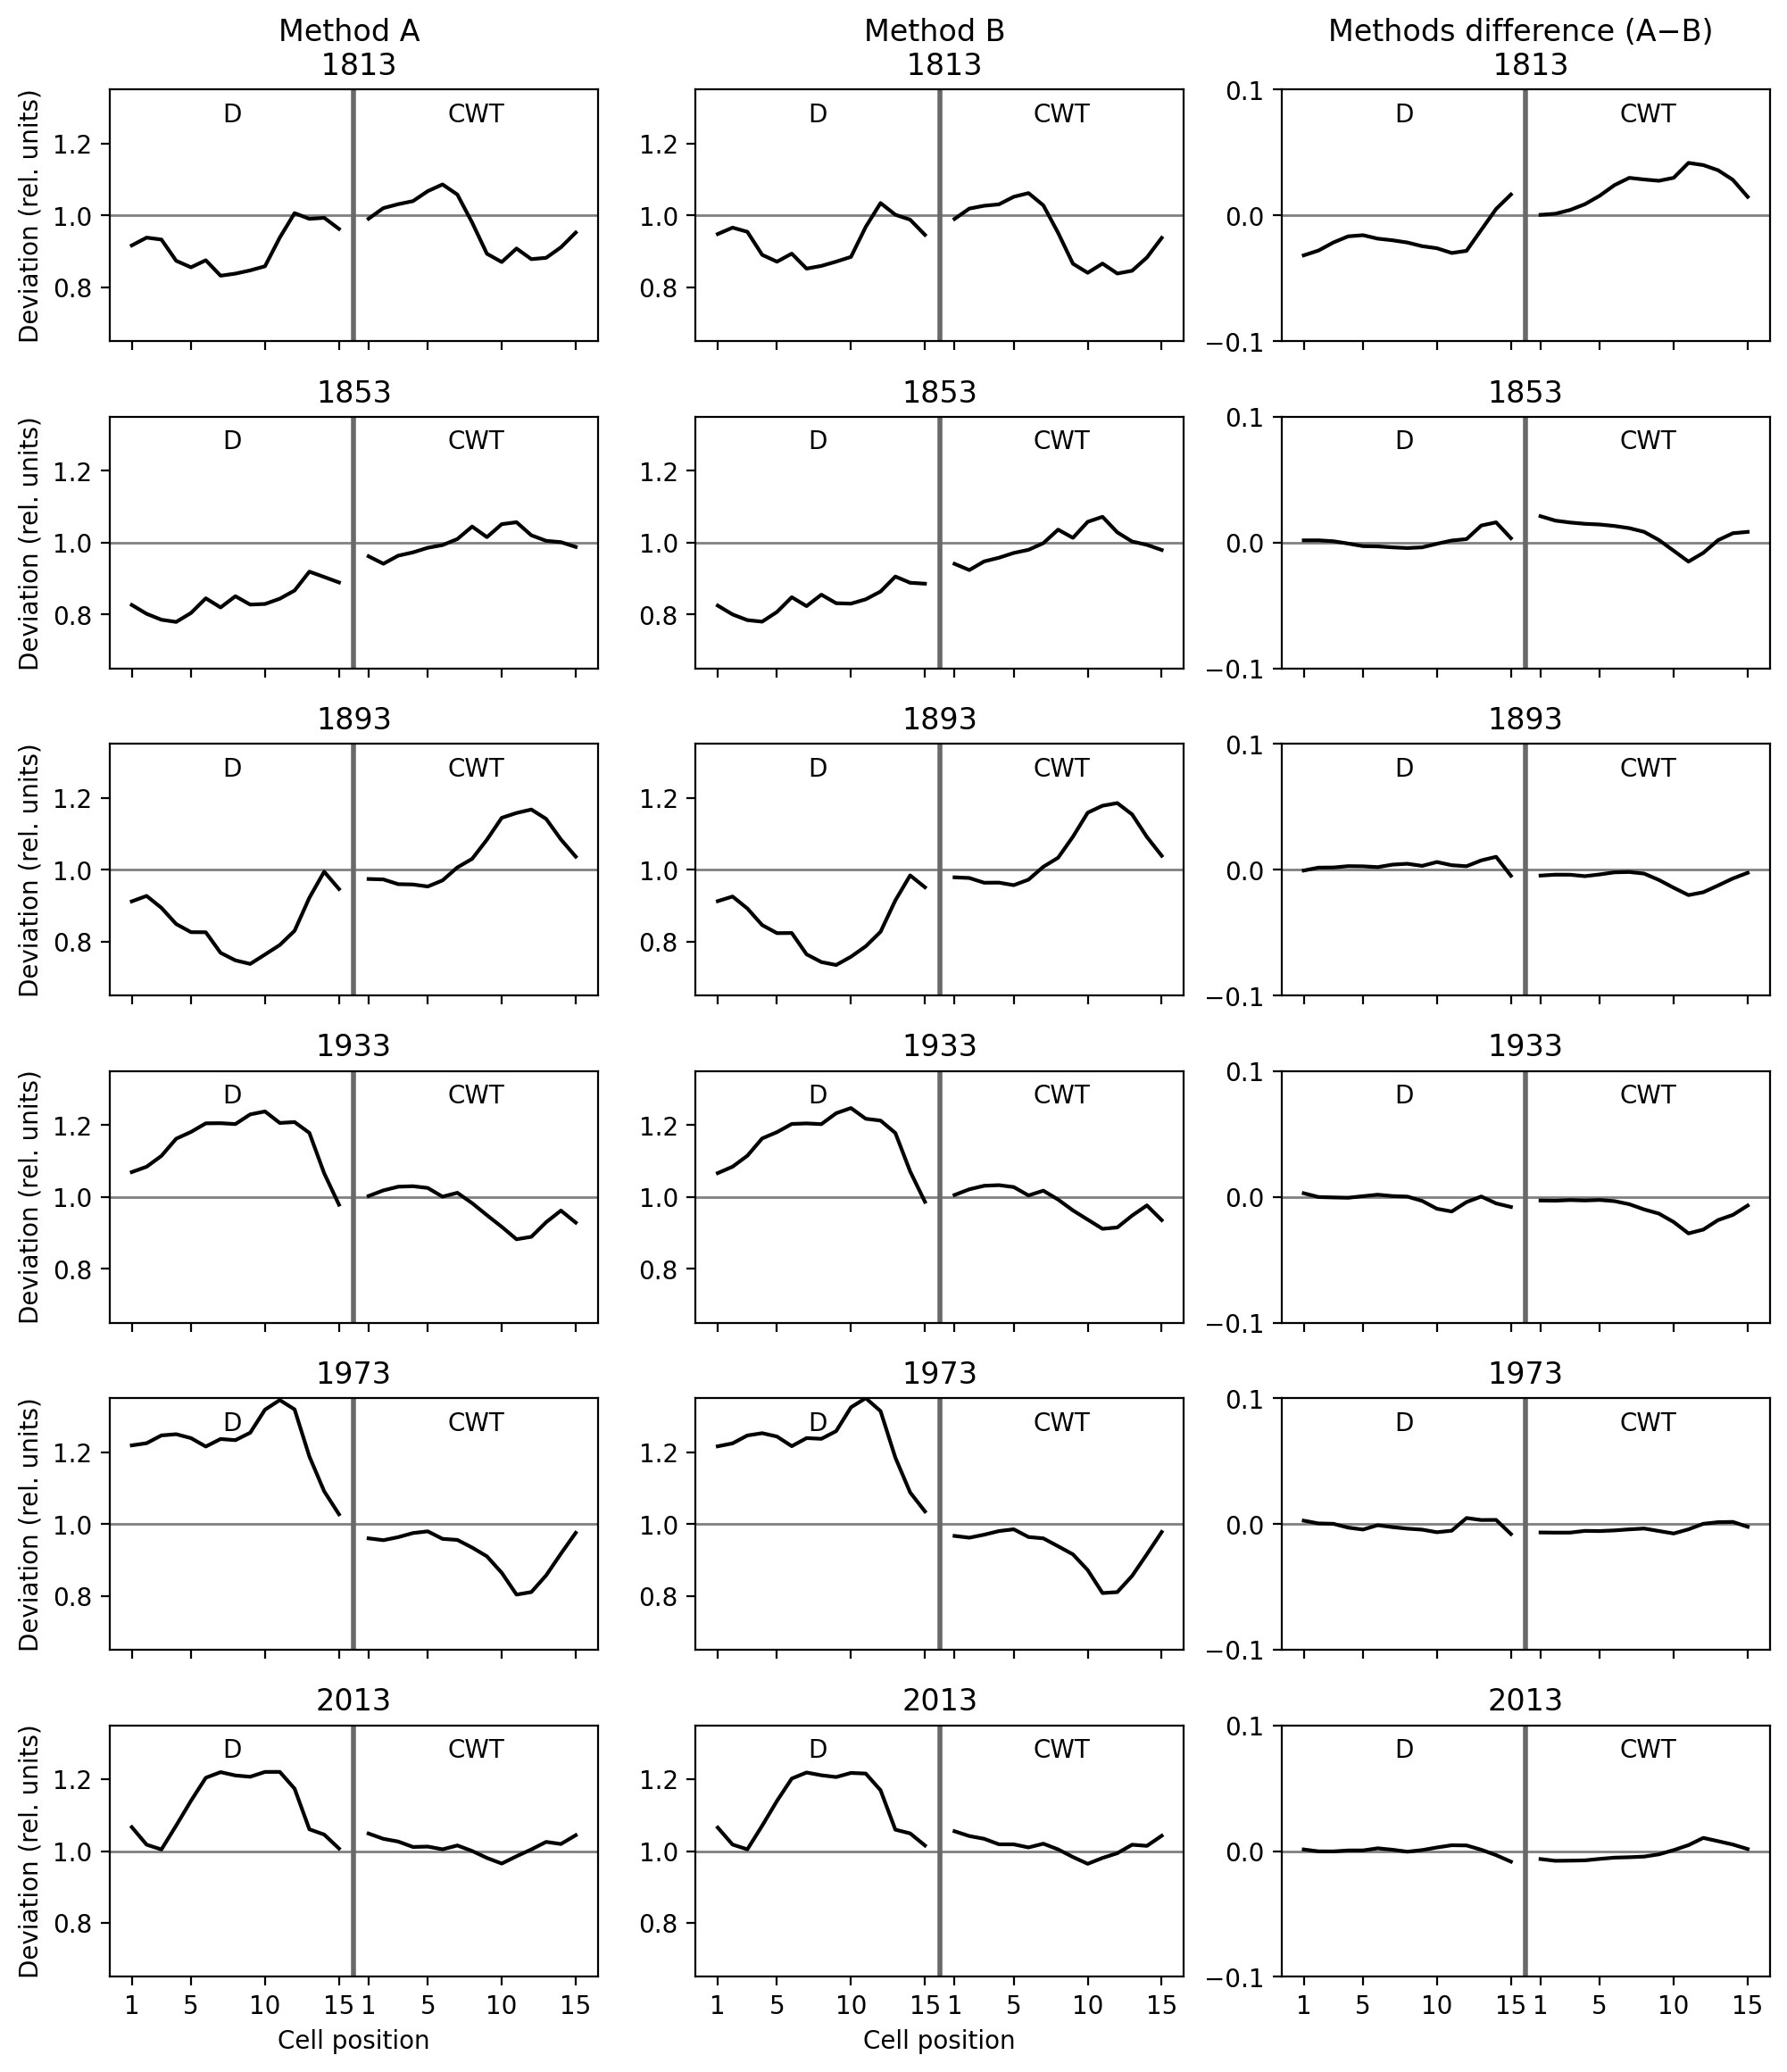

In [18]:
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(12,14), dpi=200, sharex='col')
plt.subplots_adjust(hspace=0.3)

step = 40

for i in range(6):
    for j in range(3):
        ax[i, j].set_title(1813 + i*step)
        if j<2:
            ax[i, j].axhline(y=1, c='grey', linewidth=1)
        else:
            ax[i, j].axhline(y=0, c='grey', linewidth=1)
        ax[i, j].axvline(x=16, c='dimgrey', linewidth=2 )
        ax[i, j].set_ylim([0.65, 1.35])
        ax[i, j].set_xticks([1, 5, 10, 15, 17, 21, 26, 31])
        ax[i, j].set_xticklabels([1, 5, 10, 15, 1, 5, 10, 15])
        ax[i, j].text(0.25, 0.90, 'D', horizontalalignment='center', verticalalignment='center', transform=ax[i, j].transAxes)
        ax[i, j].text(0.75, 0.90, 'CWT', horizontalalignment='center', verticalalignment='center', transform=ax[i, j].transAxes)
    
    a_list = list(quotient_deviation_df_A[quotient_deviation_df_A['Year']==1813 + i*step].iloc[0][1:])
    b_list = list(quotient_deviation_df_B[quotient_deviation_df_B['Year']==1813 + i*step].iloc[0][1:])
    methods_diff = np.array(a_list)-np.array(b_list)
    
    ax[i,0].set_ylabel("Deviation (rel. units)")

    ax[i,0].plot(range(1,16), a_list[:15], c='k')
    ax[i,0].plot(range(17,32), a_list[15:], c='k')
    
    ax[i,1].plot(range(1,16), b_list[:15], c='k')
    ax[i,1].plot(range(17,32), b_list[15:], c='k')

    ax[i,2].plot(range(1,16), methods_diff[:15], c='k')
    ax[i,2].plot(range(17,32), methods_diff[15:], c='k')

    ax[i, 2].set_ylim([-.1, .1])
    ax[i, 2].set_yticks([-.1, 0, .1])

ax[0,0].set_title("Method A \n 1813")
ax[0,1].set_title("Method B \n 1813")
ax[0,2].set_title("Methods difference (A−B) \n 1813")
ax[-1, 0].set_xlabel("Cell position")
ax[-1, 1].set_xlabel("Cell position")
plt.show()

In [19]:
fig.savefig(f'../output/Fig S1.png', dpi=300, facecolor='white') 
plt.close(fig)

In [43]:

years = set(quotient_deviation_df_A['Year'])
methods_diffs_d = dict()
methods_diffs_cwt = dict()
for year in years:
    a_list = list(quotient_deviation_df_A[quotient_deviation_df_A['Year']==year].iloc[0][1:])
    b_list = list(quotient_deviation_df_B[quotient_deviation_df_B['Year']==year].iloc[0][1:])
    methods_diff = np.array(a_list)-np.array(b_list)
    methods_diffs_d[year] = sum(methods_diff[:15])
    methods_diffs_cwt[year] = sum(methods_diff[15:])

In [66]:
for i in range(1813, 2019):
    if not i in methods_diffs_d.keys():
        methods_diffs_d[i] = np.nan
    if not i in methods_diffs_cwt.keys():
        methods_diffs_cwt[i] = np.nan

In [74]:
methods_diffs_d = dict(sorted(methods_diffs_d.items()))
methods_diffs_cwt = dict(sorted(methods_diffs_cwt.items()))

In [92]:
bgd_norm = pd.read_excel('../input/Bograd_PISY_normalized.xlsx')

years = set(bgd_norm['Year'])
tree_nums = dict()
for year in years:
    if year < 1800:
        continue
    l = len(bgd_norm[bgd_norm['Year']==year])
    tree_nums[year] = l

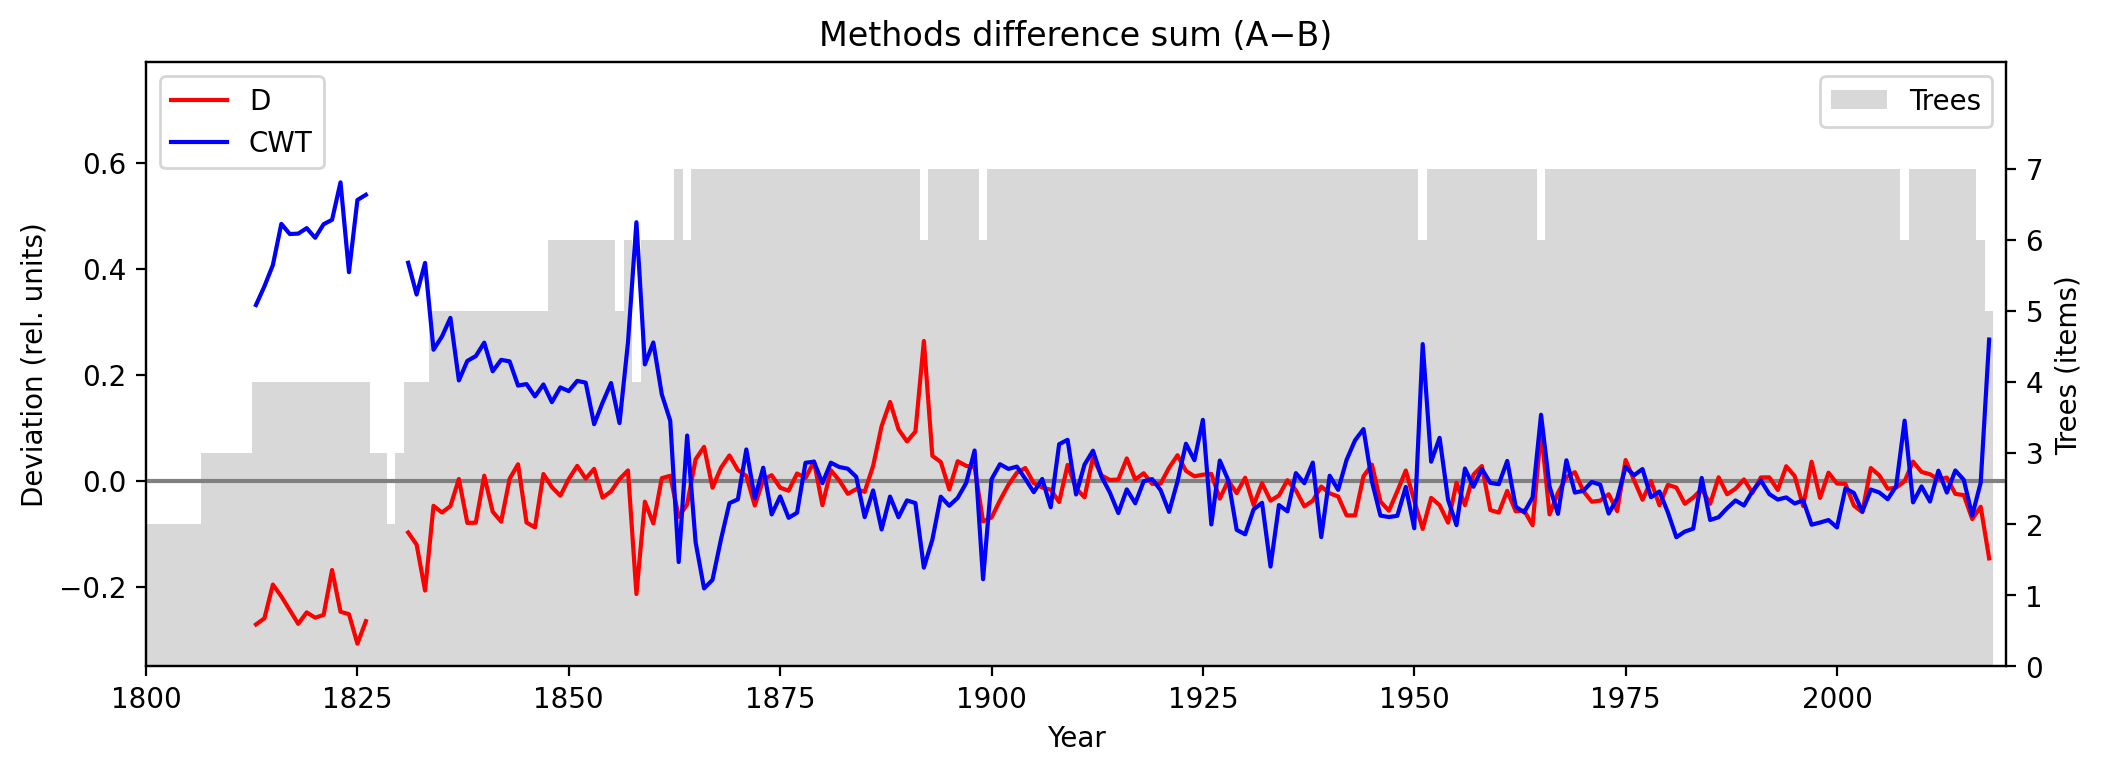

In [118]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,4), dpi=200)
ax.axhline(y=0, c='grey', linestyle='-')
ax.plot(methods_diffs_d.keys(), methods_diffs_d.values(), c='red', label='D')
ax.plot(methods_diffs_cwt.keys(), methods_diffs_cwt.values(), c='blue', label='CWT')
ax.legend(loc=2)
ax.set_ylim([-.35, .79])
ax.set_title('Methods difference sum (A−B)')
ax2 = ax.twinx()
ax2.set_ylim([0, 8.5])
ax2.set_yticks(range(8))
ax.set_zorder(1)
ax.patch.set_visible(False)  # prevents ax1 from hiding ax2
ax.set_xlim([1800, 2020])
ax2.set_xlim([1800, 2020])
ax2.bar(tree_nums.keys(), tree_nums.values(), alpha=0.3, color='grey', width=1, label='Trees')
ax2.legend(loc=1)
ax.set_xlabel("Year")
ax.set_ylabel("Deviation (rel. units)")
ax2.set_ylabel("Trees (items)")
plt.show()

In [119]:
fig.savefig(f'../output/Fig S1_diff.png', dpi=300, facecolor='white') 
plt.close(fig)